(252, 252)


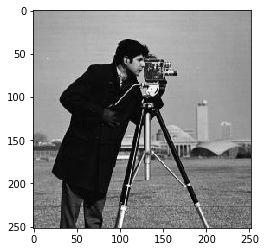

In [105]:
%matplotlib inline
import numpy as np
import os, string
from matplotlib import pyplot as plt
import scipy as sp
import cv2
import tensorflow as tf

img = cv2.imread('camera.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#img = cv2.resize(img,(0,0),fx=0.5,fy=0.5)
print(img.shape)

plt.imshow(img,cmap='gray')
plt.show()

In [144]:
def getloss(latent):
    with tf.device('/cpu:0'):
        initial = tf.random_normal([252,latent]) * 0.256
        A = tf.Variable(initial)
        initial = tf.random_normal([latent,252]) * 0.256
        Phi = tf.Variable(initial)
        IMG=tf.placeholder("float", shape=[252,252])
        mu = 0.0001
        sparse = tf.matmul(A,Phi)
        #print(sparse.get_shape())
        loss = sparse - IMG
        loss = tf.reshape(loss,[252*252,-1])
        A_ravel = tf.reshape(A,[latent*252,-1])
        loss = tf.nn.l2_loss(loss)
        #l1reg = mu*tf.nn.relu(Phi_ravel)
        regloss = loss+mu*tf.nn.l2_loss(A_ravel)
        return regloss,loss,IMG,sparse
    

In [ ]:
regloss1,loss1,IMG1,sparse1 = getloss(20)
regloss2,loss2,IMG2,sparse2 = getloss(50)
train_op1 = tf.train.GradientDescentOptimizer(0.000002).minimize(regloss1)
train_op2 = tf.train.GradientDescentOptimizer(0.000002).minimize(regloss2)
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)
#Img_ravel = img.reshape([252,252])
#Img_ravel = Img_ravel.transpose(3,0,1,2)
for step in range(10001):
    _,test1 = sess.run([train_op1,loss1],feed_dict={IMG1:img})
    _,test2 = sess.run([train_op2,loss2],feed_dict={IMG2:img})
    if step % 1000 == 0:
        print('epoch:',step,'loss1:',test1,' loss2:',test2)

res1 = sess.run(sparse1)
res2 = sess.run(sparse2)
#print(res.shape)

epoch: 0 loss1: 5.67121e+08  loss2: 5.67123e+08
epoch: 1000 loss1: 1.82857e+07  loss2: 1.48234e+07
epoch: 2000 loss1: 9.32175e+06  loss2: 5.73967e+06
epoch: 3000 loss1: 7.95002e+06  loss2: 3.48109e+06
epoch: 4000 loss1: 7.77433e+06  loss2: 2.59242e+06
epoch: 5000 loss1: 7.7196e+06  loss2: 2.27863e+06
epoch: 6000 loss1: 7.69138e+06  loss2: 2.17013e+06
epoch: 7000 loss1: 7.67253e+06  loss2: 2.12555e+06
epoch: 8000 loss1: 7.65708e+06  loss2: 2.10149e+06


/usr/local/lib/python3.6/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


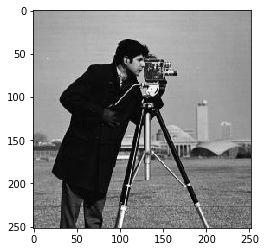

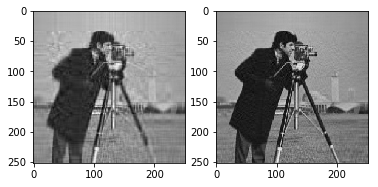

In [142]:
#resImg = res.transpose([1,2,3,0])
resImg1 = res1#resImg.reshape([252,252])
resImg2 = res2
fig = plt.figure()
#ax = fig.add_subplot(131)  
#x.imshow(img,cmap='gray')
plt.imshow(img,cmap='gray')
fig = plt.figure()
ax = fig.add_subplot(121)  
ax.imshow(resImg1,cmap='gray')
#plt.imshow(resImg1,cmap='gray')
#fig = plt.figure()
ax = fig.add_subplot(122)  
ax.imshow(resImg2,cmap='gray')
#plt.imshow(resImg2,cmap='gray')
fig.show()